In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import sympy as sm
import matplotlib.pyplot as pl


# sp.special.gamma

$   
    \Gamma(z) = \int_0^\infty t^{z-1} e^{-t} dt
$    

# sm.gamma


$
    \Gamma(x) := \int^{\infty}_{0} t^{x-1} e^{-t} \mathrm{d}t.
$    

In [2]:
sp.special.gamma(np.arange(-10,10,.5))

array([            inf,  2.77212791e-06,             inf, -2.63352152e-05,
                   inf,  2.23849329e-04,             inf, -1.67886997e-03,
                   inf,  1.09126548e-02,             inf, -6.00196013e-02,
                   inf,  2.70088206e-01,             inf, -9.45308720e-01,
                   inf,  2.36327180e+00,             inf, -3.54490770e+00,
                   inf,  1.77245385e+00,  1.00000000e+00,  8.86226925e-01,
        1.00000000e+00,  1.32934039e+00,  2.00000000e+00,  3.32335097e+00,
        6.00000000e+00,  1.16317284e+01,  2.40000000e+01,  5.23427778e+01,
        1.20000000e+02,  2.87885278e+02,  7.20000000e+02,  1.87125431e+03,
        5.04000000e+03,  1.40344073e+04,  4.03200000e+04,  1.19292462e+05])

In [3]:
np.array([sm.gamma(x) for x in np.arange(-10,10,.5)])

array([zoo, 2.77212791157510e-6, zoo, -2.63352151599635e-5, zoo,
       0.000223849328859689, zoo, -0.00167886996644767, zoo,
       0.0109126547819099, zoo, -0.0600196013005042, zoo,
       0.270088205852269, zoo, -0.945308720482942, zoo, 2.36327180120735,
       zoo, -3.54490770181103, zoo, 1.77245385090552, 1,
       0.886226925452758, 1.00000000000000, 1.32934038817914,
       2.00000000000000, 3.32335097044784, 6.00000000000000,
       11.6317283965674, 24.0000000000000, 52.3427777845535,
       120.000000000000, 287.885277815044, 720.000000000000,
       1871.25430579779, 5040.00000000000, 14034.4072934834,
       40320.0000000000, 119292.461994609], dtype=object)

In [4]:
x= sm.symbols('x')
sm.gamma(x)

gamma(x)

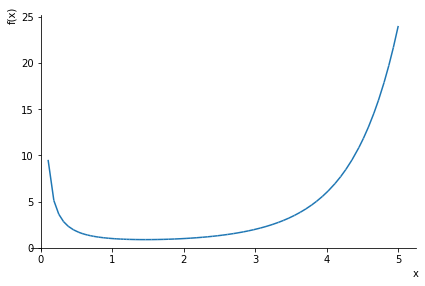

In [5]:
sm.plotting.plot(sm.gamma(x), (x,.1,5))

In [6]:
sm.gamma(1/2)

1.77245385090552

In [7]:
sp.special.gamma(1/2)

1.7724538509055159

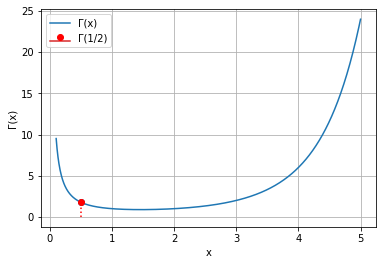

In [8]:
# Home Work:

t= np.linspace(.1,5,1001)
y= sp.special.gamma(t)
pl.plot(t,y, label='Γ(x)')

t1= 1/2
y1= sp.special.gamma(t1)
pl.scatter([t1],[y1])
pl.stem([t1],[y1], 
        linefmt='r:', 
        markerfmt='ro', 
        label='Γ(1/2)')

pl.xlabel('x')
pl.ylabel('Γ(x)')

pl.legend()
pl.grid()

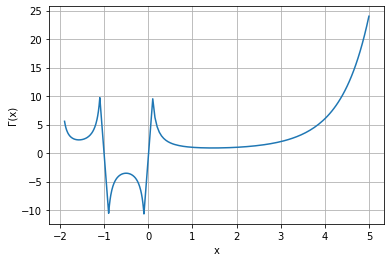

In [9]:
t1= np.linspace(.1,5,100)
y1= sp.special.gamma(t1)

t2= np.linspace(-.9,-.1,100)
y2= sp.special.gamma(t2)

t3= np.linspace(-1.9,-1.1,100)
y3= sp.special.gamma(t3)

t= np.concatenate((t3, t2, t1))
y= np.concatenate((y3, y2,y1))

pl.plot(t,y)
pl.xlabel('x')
pl.ylabel('Γ(x)')
pl.grid()

In [10]:
def ryΓ(x):
    t= sm.symbols('t')
    y= sm.integrate( t**(x-1) * sm.exp(-t), (t,0,sm.oo))
    return y
ryΓ(1/2)

1.77245385090552

In [11]:
# 如何讓 sympy 做出 Γ (1/2) = sm.sqrt(π) , symbolically
π= sm.pi
sm.sqrt(π)

sqrt(pi)

In [12]:
sm.sqrt(π).evalf()

1.77245385090552

# 再仔細想想，Gamma 函數的起源...

In [13]:
def f(x,  k= sm.symbols('k')):
    y= x**k * sm.exp(-x)
    return y

def F(k):
    y= f(x, k).integrate((x, 0, sm.oo))
    return y

x, k, t= sm.symbols('x,k,t', positive=True)
display(f(x,k))

x**k*exp(-x)

In [14]:
F(k)

gamma(k + 1)

In [15]:

#k.assumptions0

In [16]:
for k in range(10):   
    
    #print(f'k= {k}, f(x)=')
    #display(f(x,k))
    
    #'''
    F= f(t, k).integrate((t,0,sm.oo)) #.subs(x, sm.oo)
    #print('integrate f(x), F(x)= ')
    display(F)
    #'''
    #print('-'*20)


1

1

2

6

24

120

720

5040

40320

362880

In [17]:
k= 9
F= f(x, k).integrate((x,0,x))
F

(-x**9 - 9*x**8 - 72*x**7 - 504*x**6 - 3024*x**5 - 15120*x**4 - 60480*x**3 - 181440*x**2 - 362880*x - 362880)*exp(-x) + 362880

In [18]:
k= 10
F= f(x, k).integrate((x,0,x))
F

(-x**10 - 10*x**9 - 90*x**8 - 720*x**7 - 5040*x**6 - 30240*x**5 - 151200*x**4 - 604800*x**3 - 1814400*x**2 - 3628800*x - 3628800)*exp(-x) + 3628800

In [19]:

for i in range(10):
    display(f(x, i).diff(x))


-exp(-x)

-x*exp(-x) + exp(-x)

-x**2*exp(-x) + 2*x*exp(-x)

-x**3*exp(-x) + 3*x**2*exp(-x)

-x**4*exp(-x) + 4*x**3*exp(-x)

-x**5*exp(-x) + 5*x**4*exp(-x)

-x**6*exp(-x) + 6*x**5*exp(-x)

-x**7*exp(-x) + 7*x**6*exp(-x)

-x**8*exp(-x) + 8*x**7*exp(-x)

-x**9*exp(-x) + 9*x**8*exp(-x)

In [20]:
for i in np.arange(-.9,10,.1):
    display(
        f(x, i).integrate(
            (x,0,sm.oo)))


9.51350769866873

4.59084371199880

2.99156898768759

2.21815954375769

1.77245385090552

1.48919224881282

1.29805533264756

1.16422971372530

1.06862870211932

1.00000000000000

0.951350769866873

0.918168742399761

0.897470696306277

0.887263817503075

0.886226925452758

0.893515349287690

0.908638732853290

0.931383770980243

0.961765831907387

1.00000000000000

1.04648584685356

1.10180249087971

1.16671190519816

1.24216934450430

1.32934038817914

1.42962455886030

1.54468584585059

1.67649078776444

1.82735508062404

2.00000000000000

2.19762027839248

2.42396547993537

2.68343738195577

2.98120642681033

3.32335097044784

3.71702385303679

4.17065178379660

4.69417420574042

5.29932973380970

5.99999999999999

6.81262286301668

7.75668953579317

8.85534336045403

10.1361018511551

11.6317283965674

13.3812858709324

15.4314116000474

17.8378619818136

20.6673859618578

23.9999999999999

27.9317537383683

32.5780960503313

38.0779764499523

44.5988481450825

52.3427777845534

61.5539150062891

72.5276345202227

85.6217375127050

101.270191213103

120.000000000000

142.451944065678

169.406099461723

201.813275184747

240.833779983445

287.885277815043

344.701924035219

413.407516765269

496.606077573689

597.494128157309

719.999999999998

868.956858800637

1050.31781666268

1271.42363366390

1541.33619189405

1871.25430579778

2275.03269863244

2769.83036232730

3376.92132750108

4122.70948428542

5039.99999999998

6169.59369748452

7562.28827997128

9281.39252574648

11405.8878200160

14034.4072934834

17290.2485096066

21327.6937899202

26339.9863545084

32569.4049258548

40319.9999999998

49973.7089496246

62010.7638957644

77035.5579636958

95809.4576881337

119292.461994609

148696.137182616

185550.935972306

231791.879919674

289867.703840107

362879.999999999

454760.751441584

570499.027841033

716430.689062371

900608.902268457

1133278.38894878

1427482.91695312

1799844.07893136

2271560.42321280

2869690.26801706

In [21]:
f(x,-1/2)

x**(-0.5)*exp(-x)

In [22]:
%matplotlib qt

from ryPat import *

def f(x,  k= sm.symbols('k')):
    y= x**k * sm.exp(-x)
    return y

display(f(x))

xx= np.linspace(0,10,101)

F= {}
for k in np.arange(-.5, 4.5, .5):
    F[k]= f(x, k).integrate((x,0,sm.oo))

for k in np.arange(-.5, 4.5, .5):
    f1= f(x,k)/ F[k]
    yy= sm.lambdify(x,f1)(xx)
    
    pl.plot(xx,yy, label=f'k= {k}')
    
pl.xlabel('x')
pl.ylabel('ϕ(x; k)')
#pl.title(f'$ϕ(x;k)={sm.latex(f(x))}$' + '$ \\frac{1}{F[k]}$')
pl.title('$ ϕ(x;k)=\\frac{f(x;k)}{F[k]}$')
pl.legend()
pl.grid(True)

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in power
  return (0.564189583547756*x**(-0.5)*exp(-x))


In [23]:
F= {}
for k in np.arange(-.5, 4, .5):
    F[k]= f(x, k).integrate((x,0,sm.oo))
F

In [24]:
F= {}
for k in np.arange(-1, 4.5, .5):
    F[k]= f(x, k).integrate((x,0,sm.oo))
F

pl.stem(F.keys(), F.values())
pl.xlabel('k')
pl.ylabel('$F[k]$')
pl.title('$F[k]= \int_{0}^{\infty}{f(x; k) dx}$')

Text(0.5, 1.0, '$F[k]= \\int_{0}^{\\infty}{f(x; k) dx}$')

# scipy.stats 中定義的標準型 gamma Distribution

In [25]:
# scipy.stats 中定義的標準型 gamma Distribution

import scipy.stats as st

xx= np.linspace(0,10,101)

pl.figure()
for κ in np.arange(0.5, 5.5, .5):
    
    yy= st.gamma(a=κ).pdf(xx)
    
    pl.plot(xx,yy, label=f'κ= {κ}')
    
pl.xlabel('x')
pl.ylabel('g(x; κ)')
pl.title('$ g(x;κ) = st.gamma(a=κ).pdf(x)$')
pl.legend()
pl.grid(True)


# st.gamma?

$$
f(x, a) = \frac{x^{a-1} e^{-x}}{\Gamma(a)}
$$

# Gamma vs Poisson


In [26]:
def poisson(x):
    y= 2**x /sm.factorial(x) /sm.exp(2)
    return y

x= sm.Symbol('x', integer= True)
x

# pmf
fx= poisson(x)
fx

# sum to 1
s= sm.Sum(fx, (x,0,sm.oo)).doit()
s

# mean
μ= sm.Sum(x *fx, (x,0,sm.oo)).doit()
μ

# variance
v= sm.Sum(x**2 *fx, (x,0,sm.oo)).doit()
v= v-μ**2
v

In [27]:
def gamma(x):
    y= x**2 /sm.factorial(2) /sm.exp(x)
    return y

x= sm.Symbol('x', integer= True)
x

# pdf
fx= gamma(x)
fx

# sum to 1
s= sm.integrate(fx, (x,0,sm.oo)).doit()
s

# mean
μ= sm.integrate(x *fx, (x,0,sm.oo)).doit()
μ

# variance
v= sm.integrate(x**2 *fx, (x,0,sm.oo)).doit()
v= v- μ**2
v

In [149]:
#
# compare Gamma and Poisson
#
def poisson(x, a):
    y= a**x /sm.factorial(x) /sm.exp(a)
    return y

x= sm.Symbol('x', integer= True, positive=True)
a= sm.Symbol('a', positive= True)
display(x, a)

# pmf
fx= poisson(x,a) #.subs(a,2)
display(fx)

# sum to 1
s= sm.Sum(fx, (x,0,sm.oo))
display(s.doit())

# mean
μ= sm.Sum(x *fx, (x,0,sm.oo))
display(μ.doit())

# variance
v= sm.Sum(x**2 *fx, (x,0,sm.oo)).doit()
v= v-μ**2
display(v.doit().simplify())

print('----------------------------')

def gamma(x,a):
    y= x**(a-1) /sm.factorial(a-1) /sm.exp(x)
    return y

x= sm.Symbol('x', positive=True)
a= sm.Symbol('a', positive= True, integer=True)
display(x,a)

# pdf
fx= gamma(x,a)
display(fx)

# sum to 1
s= sm.integrate(fx, (x,0,sm.oo)).doit()
display(s.simplify())

# mean
μ= sm.integrate(x *fx, (x,0,sm.oo)).doit()
display(μ.simplify())

# variance
v= sm.integrate(x**2 *fx, (x,0,sm.oo)).doit()
v= v- μ**2
display(v.simplify())

x

a

a**x*exp(-a)/factorial(x)

1

a

a

----------------------------


x

a

x**(a - 1)*exp(-x)/factorial(a - 1)

1

a

a

In [28]:

x= sm.Symbol('x')
fx= poisson(x)
s= sm.integrate(fx, (x,0,sm.oo)).doit()
s.simplify().evalf()

In [29]:
0.996147383562494


# Introduction to the Gamma Function
- http://numbers.computation.free.fr/Constants/Miscellaneous/gammaFunction.html

- Swiss mathematician Leonhard Euler (1707-1783)

Definition 1 (Euler, 1730) Let x > 0
G(x)=	ó
õ	1

0 
( -log(t)) x-1dt.
(1)


In [12]:
import sympy as sm

def Γ(x= sm.Symbol('x')):
    
    t= sm.Symbol('t')
    y= sm.integrate(
        (-sm.log(t))**(x-1),
        (t,0,1)
    )
    return y

In [19]:
x= sm.Symbol('x')
Γ(.5).evalf()

1.77245385090552

In [20]:
sm.gamma(.5)

1.77245385090552

In [21]:
def Γ2(x= sm.Symbol('x')):
    
    t= sm.Symbol('t')
    y= sm.integrate(
        t**(2*x-1) * sm.exp(-t**2),
        (t,0,sm.oo)
    )
    y= y*2
    return y

In [28]:
x= sm.Symbol('x', positive= True)
Γ2(x)==sm.gamma(x)

True

In [40]:
x= sm.Symbol('x', positive= True)
x

x

In [46]:
#for n in range(1,10):
display(sm.gamma(100))

933262154439441526816992388562667004907159682643816214685929638952175999932299156089414639761565182862536979208272237582511852109168640000000000000000000000

In [51]:
def stir(x):
    y= x**(x+1/2) * sm.exp(-x) *sm.sqrt(2*sm.pi)
    return y
stir(x)

sqrt(2)*sqrt(pi)*x**(x + 0.5)*exp(-x)

In [49]:
(stir(100)-sm.gamma(101))/sm.gamma(101)

-1 + 1.07151028812547e+43*sqrt(2)*sqrt(pi)*exp(-100)

In [50]:
_.evalf()

-0.000832983432157007

In [73]:
x= sm.Symbol('x', positive= True)

import seaborn as sb
sb.set_theme()

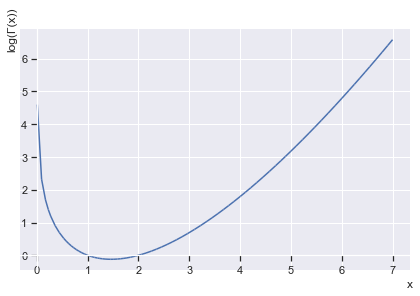

In [89]:
x= sm.Symbol('x', positive= True)
y= sm.gamma(x)
y= sm.log(y)
q= sm.plotting.plot(
    y, 
    (x,0.01,7),
    ylabel= 'log(Γ(x))'
)

In [79]:
sm.gamma(11)

3628800

In [155]:
# From Gamma to χ**2

def χ2(x, ν=1):
    a= ν/2
    θ= 2
    y= x**(a-1) * sm.exp(-x/θ) /sm.gamma(a)/ θ**a
    return y
x,ν= sm.symbols('x,ν')
χ2(x,ν)

2**(-ν/2)*x**(ν/2 - 1)*exp(-x/2)/gamma(ν/2)

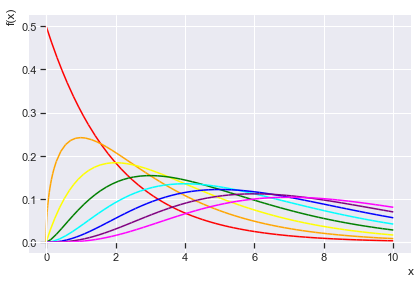

In [176]:
ryColorMap=[
    'red', 
    'orange', 
    'yellow', 
    'green',
    'cyan',
    'blue',
    'purple',
    'magenta',
    'gray',
    'black']

import matplotlib.pyplot as pl

pl.rcParams['axes.prop_cycle']= pl.cycler(
    color= ryColorMap)

qL= []
for ν in range(2,10):
    q= sm.plotting.plot(χ2(x,ν), (x,0,10), show=False)
    qL += [q]
q0= qL[0]
for i,q in enumerate(qL[1:]):
    q[0].line_color= ryColorMap[i+1]
    q0.append(q[0])
q0.show()


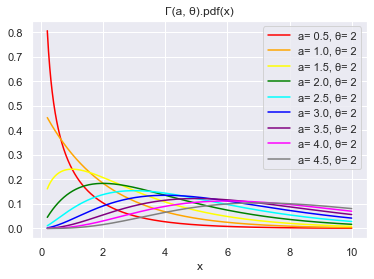

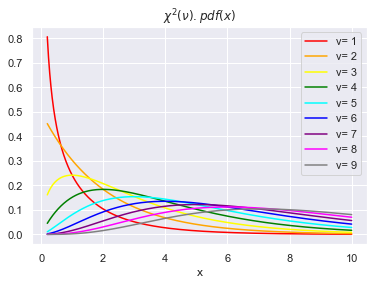

In [205]:
import numpy as np
import scipy.stats as st

xx= np.linspace(0.2,10,1001)

pl.figure()
θ= 2
for ν in range(1,10):
    a= ν/2
    yy= st.gamma(a= a , scale= θ).pdf(xx)
    pl.plot(xx,yy, label=f'a= {a}, θ= {θ}')
pl.title('Γ(a, θ).pdf(x)')
pl.xlabel('x')
pl.legend()

pl.figure()
for ν in range(1,10):
    yy= st.chi2(df=ν).pdf(xx)
    pl.plot(xx,yy, label=f'ν= {ν}')
pl.title('$χ^2(ν).pdf(x)$')
pl.xlabel('x')
pl.legend()

In [236]:
# lower incomplete gamma function
def γ(α, x):
    t= sm.symbols('t')
    y= t**(α-1) *sm.exp(-t)
    y= sm.integrate(y, (t,0,x))
    #y= y.simplify()
    return y
α, x= sm.symbols('α, x')
γ(α, x)

αs, xs= np.mgrid[1:3, 0:5:.1]
f= sm.lambdify(
    (α, x), γ(α, x)
)(αs, xs)
f.shape

#zm= sm.lambdify((x,y),z)(xm,ym)
%matplotlib qt

fg= pl.figure()
ax= pl.axes(projection='3d')
ax.contour3D(αs, xs, f, 100,
             cmap= 'rainbow')
ax.set_xlabel('α')
ax.set_ylabel('x')

In [245]:
# gamma distribution
def g(x, α):
    y= x**(α-1) *sm.exp(-x)
    y= y /sm.gamma(α)
    return y
x, α= sm.symbols('x, α')
g(x, α)

x**(α - 1)*exp(-x)/gamma(α)

In [279]:
# using sympy

xs, αs = np.mgrid[1:10:.05, 1:10:.05]

f= sm.lambdify(
    (x, α), g(x, α)
)(xs, αs)

f.shape

#zm= sm.lambdify((x,y),z)(xm,ym)
%matplotlib qt

fg= pl.figure()
ax= pl.axes(projection='3d')
ax.contour3D(xs, αs, f, 100,
             cmap= 'rainbow')
ax.set_xlabel('x')
ax.set_ylabel('α')

Text(0.5, 0, 'α')

In [295]:
# using scipy.stats
import scipy.stats as st

xs, αs = np.mgrid[1:10:.01, 1:10:.01]

# try a strange function
def f(x, k):
    y= x**k/ 2**x / sc.factorial(k)
    return y

#f= st.gamma.pdf(xs, a= αs, scale=2)
f= f(x=xs, k=αs )
f.shape

(900, 900)

In [296]:
#zm= sm.lambdify((x,y),z)(xm,ym)
%matplotlib qt

fg= pl.figure()
ax= pl.axes(projection='3d')
ax.contour3D(xs, αs, f, 100,
             cmap= 'rainbow')
ax.set_xlabel('x')
ax.set_ylabel('α')

Text(0.5, 0, 'α')

In [ ]:
# try a strange function
def f(x, k):
    y= x**k/ 2**x / sc.factorial(k)
    return y

    

In [292]:
import scipy.special as sc
sc.factorial([1,2,3,4])

array([ 1.,  2.,  6., 24.])

In [308]:
pl.plot(sc.factorial(np.linspace(-1,5,101)))

In [309]:
sc.factorial(10)

3628800.0

In [310]:
sc.gamma(11)

3628800.0